In [1]:
# File name
fn1 = "Sami"
ln1 = "Kouzeiha"
filename = "_".join(map(lambda s: s.strip().lower(), ["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
filename

'sd-tsia204_lab2_kouzeiha_sami.ipynb'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv
from scipy.stats import t
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.utils import resample
from scipy.stats import t
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import t

In [3]:
from sklearn.datasets import fetch_california_housing

data=fetch_california_housing()
data.feature_names
y = data.target
x = data.data
x = np.c_[np.ones(x.shape[0]), x]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


def normal_equation(X,Y):
    return np.linalg.inv(X.T @ X) @ X.T @ Y

theta_estimated = normal_equation(X_train,y_train)
y_train_pred = X_train @ theta_estimated
y_test_pred = X_test @ theta_estimated

def mse(Y_pred,Y):
    return np.mean((Y_pred - Y) ** 2)

mse_train = mse(y_train_pred,y_train)
mse_test = mse(y_test_pred,y_test)


def r_squared(Y_pred, Y):
    SSR = np.sum((Y - Y_pred) ** 2)
    SST = np.sum((Y - np.mean(Y)) ** 2)
    return 1 - (SSR / SST)

r_squared_train = r_squared(y_train_pred,y_train)
r_squared_test = r_squared(y_test_pred,y_test)



sk_squared_train = r2_score(y_train,y_train_pred)
sk_squared_test = r2_score(y_test,y_test_pred)

sk_mse_train = mean_squared_error(y_train,y_train_pred, squared=True)
sk_mse_test = mean_squared_error(y_test,y_test_pred, squared=True)

comparison_string = (
    f"Calculated vs Sklearn Metrics Comparison:\n"
    f"-------------------------------------\n"
    f"TRAINING SET:\n"
    f"Custom R-squared: {r_squared_train:.4f}, Sklearn R-squared: {sk_squared_train:.4f}\n"
    f"Custom MSE: {mse_train:.4f}, Sklearn MSE: {sk_mse_train:.4f}\n"
    f"\n"
    f"TEST SET:\n"
    f"Custom R-squared: {r_squared_test:.4f}, Sklearn R-squared: {sk_squared_test:.4f}\n"
    f"Custom MSE: {mse_test:.4f}, Sklearn MSE: {sk_mse_test:.4f}"
)

print(comparison_string)

Calculated vs Sklearn Metrics Comparison:
-------------------------------------
TRAINING SET:
Custom R-squared: 0.6099, Sklearn R-squared: 0.6099
Custom MSE: 0.5206, Sklearn MSE: 0.5206

TEST SET:
Custom R-squared: 0.5911, Sklearn R-squared: 0.5911
Custom MSE: 0.5411, Sklearn MSE: 0.5411


In [4]:
n,p = X_train.shape
residual = y_train-y_train_pred
sigma_hat_square = np.sum(residual**2) / ( n - p - 1 )
alpha = 0.01  #

t_critical = t.ppf(1 - alpha / 2, df=n - p - 1)
se = np.sqrt(sigma_hat_square * np.diag(np.linalg.inv(X_train.T @ X_train)))

# confidence intervals
lower_bound = theta_estimated - t_critical * se
upper_bound = theta_estimated + t_critical * se

CI = list(zip(lower_bound, upper_bound))
CI


[(-38.96812113416266, -35.0875340367908),
 (0.4351177864775982, 0.4600823505563682),
 (0.008250111674265013, 0.010884940237922611),
 (-0.14233780722877432, -0.10717410508915287),
 (0.7056298894819644, 0.883312618492867),
 (-1.536208461845421e-05, 1.248403269546506e-05),
 (-0.0046993420563626416, -0.0021868177957026476),
 (-0.43973577570304756, -0.39737473767789666),
 (-0.4555706399057704, -0.4112396310541292)]

In [5]:
data_df = pd.read_csv(r"data.csv",header=None)
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,-1.298173,-0.162249,1.223379,1.355554,1.080171,0.634979,0.298741,0.548270,0.731773,1.018645,...,0.588278,0.210106,1.861458,-0.436399,0.279299,-1.416020,-2.332363,0.215096,-0.693319,151.0
1,0.166951,-0.338060,-0.618867,0.759366,1.134281,-0.536844,-0.075120,0.970251,-0.327487,0.717310,...,-0.251054,-0.825716,0.339139,1.119430,0.225958,-0.822288,0.382838,-0.718829,-0.188993,75.0
2,-0.416177,-0.205659,-1.282226,1.675500,1.523746,0.192029,-0.235840,-1.954626,-0.853309,0.892791,...,1.283837,0.372516,-0.652557,-2.579347,0.139267,-1.901196,0.048210,0.220205,0.471588,141.0
3,0.867184,-0.398667,0.093501,0.025971,1.852099,0.789774,0.801775,0.376711,0.853689,0.247953,...,0.446582,0.334733,0.399074,-0.884172,0.723819,1.316367,0.088218,0.619496,1.061662,206.0
4,1.193282,-0.936980,-0.725039,0.766078,0.223489,-1.584622,1.146866,0.086136,-0.088780,-0.945066,...,0.786157,-1.058179,-0.155788,-0.642504,2.040010,-1.703110,-1.901502,1.778811,-0.489853,135.0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



X = data_df.iloc[:, :-1]  # all rows, all columns except the last one
y = data_df.iloc[:, -1]   # all rows, only the last column

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)  # 25% data as test set

# standardizing the datasets
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()  # Reshape for compatibility
y_test_scaled=scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

reg = LinearRegression().fit(X_train_scaled, y_train)
reg.coef_




array([-3.65776419e+15, -7.41908320e+14, -3.95893021e+14, -5.42641642e+15,
       -4.62123749e+14, -9.84398063e+14,  1.70062135e+15, -3.04852554e+14,
        2.80630807e+15,  3.06120892e+15, -4.66704550e+15,  3.87669189e+15,
        1.99709550e+15,  4.12992912e+15,  5.11046980e+14, -1.39244926e+15,
        2.58732905e+15,  1.83830965e+15, -2.26769599e+15,  1.37560388e+15,
        2.90021277e+15, -2.83863191e+15, -3.00992494e+15, -5.00000000e-01,
       -5.92113137e+14,  9.79645744e+14,  8.46280657e+14, -2.86175143e+15,
        2.85855117e+15,  1.49581048e+14, -1.79448905e+14,  7.92461384e+14,
       -1.53779928e+15,  3.81609555e+15,  1.38125000e+01, -5.69974728e+14,
        8.28897567e+14, -6.18494105e+13, -4.97265893e+14, -1.27300736e+15,
        2.08413938e+15, -5.28640360e+14, -2.37006655e+15,  2.54230570e+15,
       -1.51067081e+15,  1.14846874e+15,  4.20864713e+15,  2.72340290e+14,
        1.83570977e+15,  6.91992334e+14,  3.38650455e+15,  4.82959210e+14,
       -9.25787033e+14, -

In [7]:

def calculate_p_value(X, y,n):
    model = LinearRegression().fit(X, y)
    pred = model.predict(X)
    RSS = np.sum((y - pred) ** 2)
    p=1

    # estimate the variance of the error term (sigma^2)
    sigma_squared_hat = RSS / (n - p - 1)

    # variance-covariance matrix
    var_cov_beta = sigma_squared_hat * np.linalg.inv(X.T.dot(X))
    
    standard_errors = np.sqrt(np.diag(var_cov_beta))

    #  t-statistics for each coefficient
    t_statistic = model.coef_ / standard_errors

    p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=n - 2))
    return p_value[0]

def find_best_feature(X, y):
    n = len(y)
    smallest_p_value = 1
    best_feature = -1

    for i in range(X.shape[1]):
        Xi = X.iloc[:, [i]].values
        p_value = calculate_p_value(Xi, y, n)
        
        if p_value < smallest_p_value:
            smallest_p_value = p_value
            best_feature = i

    return best_feature, smallest_p_value

X_train_df = pd.DataFrame(X_train_scaled)
best_feature, smallest_p_value = find_best_feature(X_train_df, y_train_scaled)
best_feature, smallest_p_value


(34, 0.0)

#### The p-value tests if each feature significantly predicts the target variable y. Features are selected based on the smallest p-value, implying the strongest statistical evidence against the null hypothesis (the null hypothesis states that the feature has no effect).

In [8]:
def forward_selection_b(X, y, max_iter=None):
    selected_features = []
    n = len(y)
    iteration = 0

    while True:
        if max_iter is not None and iteration >= max_iter:
            break

        best_feature, _ = find_best_feature(X, y)
        selected_features.append(X.columns[best_feature])

        # we fit model with the selected feature and subtract residuals from y
        Xi = X.iloc[:, best_feature].values.reshape(-1, 1)
        model = LinearRegression().fit(Xi, y)
        y = y - model.predict(Xi)

        # remove the selected feature from X 
        X = X.drop(X.columns[best_feature], axis=1).reset_index(drop=True)

        iteration += 1
        if X.shape[1] == 0:  # here no more features to select
            break

    return selected_features

X_train_df = pd.DataFrame(X_train_scaled)
selected_features_b = forward_selection_b(X_train_df, y_train)
selected_features_b


[34,
 58,
 79,
 123,
 135,
 167,
 30,
 77,
 168,
 174,
 129,
 183,
 13,
 208,
 74,
 172,
 190,
 194,
 38,
 198,
 133,
 191,
 75,
 165,
 7,
 59,
 81,
 17,
 131,
 18,
 118,
 99,
 68,
 57,
 203,
 113,
 54,
 170,
 29,
 71,
 66,
 15,
 2,
 112,
 98,
 43,
 88,
 50,
 121,
 94,
 28,
 193,
 14,
 70,
 48,
 175,
 199,
 179,
 100,
 184,
 182,
 117,
 101,
 52,
 32,
 61,
 33,
 6,
 96,
 4,
 21,
 130,
 83,
 41,
 134,
 120,
 23,
 73,
 162,
 128,
 80,
 26,
 176,
 95,
 206,
 192,
 47,
 147,
 44,
 89,
 186,
 69,
 140,
 132,
 90,
 187,
 86,
 109,
 42,
 37,
 156,
 180,
 40,
 195,
 119,
 157,
 205,
 137,
 152,
 144,
 116,
 111,
 11,
 92,
 49,
 62,
 161,
 103,
 171,
 35,
 91,
 106,
 166,
 169,
 143,
 164,
 84,
 24,
 60,
 76,
 163,
 51,
 124,
 181,
 16,
 150,
 110,
 87,
 36,
 65,
 64,
 173,
 55,
 107,
 19,
 146,
 114,
 56,
 126,
 20,
 196,
 105,
 188,
 1,
 27,
 0,
 160,
 45,
 204,
 122,
 78,
 153,
 148,
 149,
 142,
 97,
 136,
 197,
 108,
 177,
 145,
 25,
 46,
 53,
 154,
 151,
 72,
 12,
 63,
 185,
 104,
 22,
 10

#### We subtract from y the residuals of the model fit with feature Xf for multiple reasons :
#### 1. Residuals represent the part of y not explained by the selected feature.
#### 2. Allows the algorithm to focus on the variance in y that hasn't been explained yet by the already selected features
#### 3. This ensures each new feature selected adds unique information to the model

In [9]:
## Part c

def forward_selection_c(X, y, p_value_threshold=0.05):
    selected_features = []
    p_values = []
    original_feature_indices = list(X.columns)
    n = len(y)

    while True:
        best_feature_idx, smallest_p_value = find_best_feature(X, y)

        if smallest_p_value > p_value_threshold:
            break  # Halting condition
        
        best_feature = original_feature_indices[best_feature_idx]
        selected_features.append(best_feature)
        p_values.append(smallest_p_value)

        # we fit model with the selected feature and subtract residuals from y
        Xi = X.iloc[:, best_feature_idx].values.reshape(-1, 1)
        model = LinearRegression().fit(Xi, y)
        y = y - model.predict(Xi)

        X = X.drop(best_feature, axis=1)
        original_feature_indices.remove(best_feature)

        if X.shape[1] == 0:  # here no more features to select
            break

    return selected_features,p_values

selected_features_c = forward_selection_c(X_train_df, y_train)
selected_features_c[0]

[34, 58, 79, 123, 135, 167, 30, 77, 168, 174, 129, 183, 13]

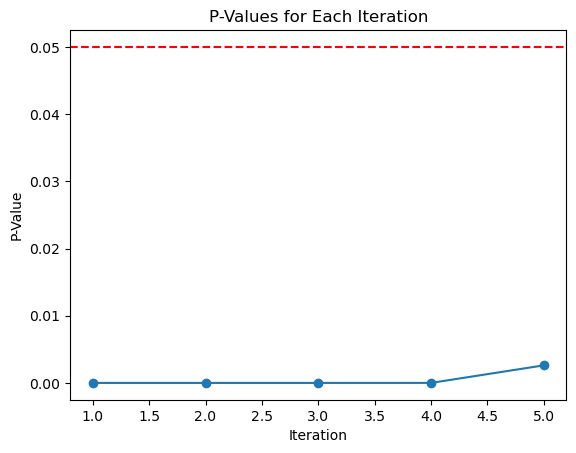

In [10]:
top5_p_values = selected_features_c[1][:5]
plt.plot(range(1, len(top5_p_values) + 1), top5_p_values, marker='o')
plt.xlabel('Iteration')
plt.ylabel('P-Value')
plt.title('P-Values for Each Iteration')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.show()

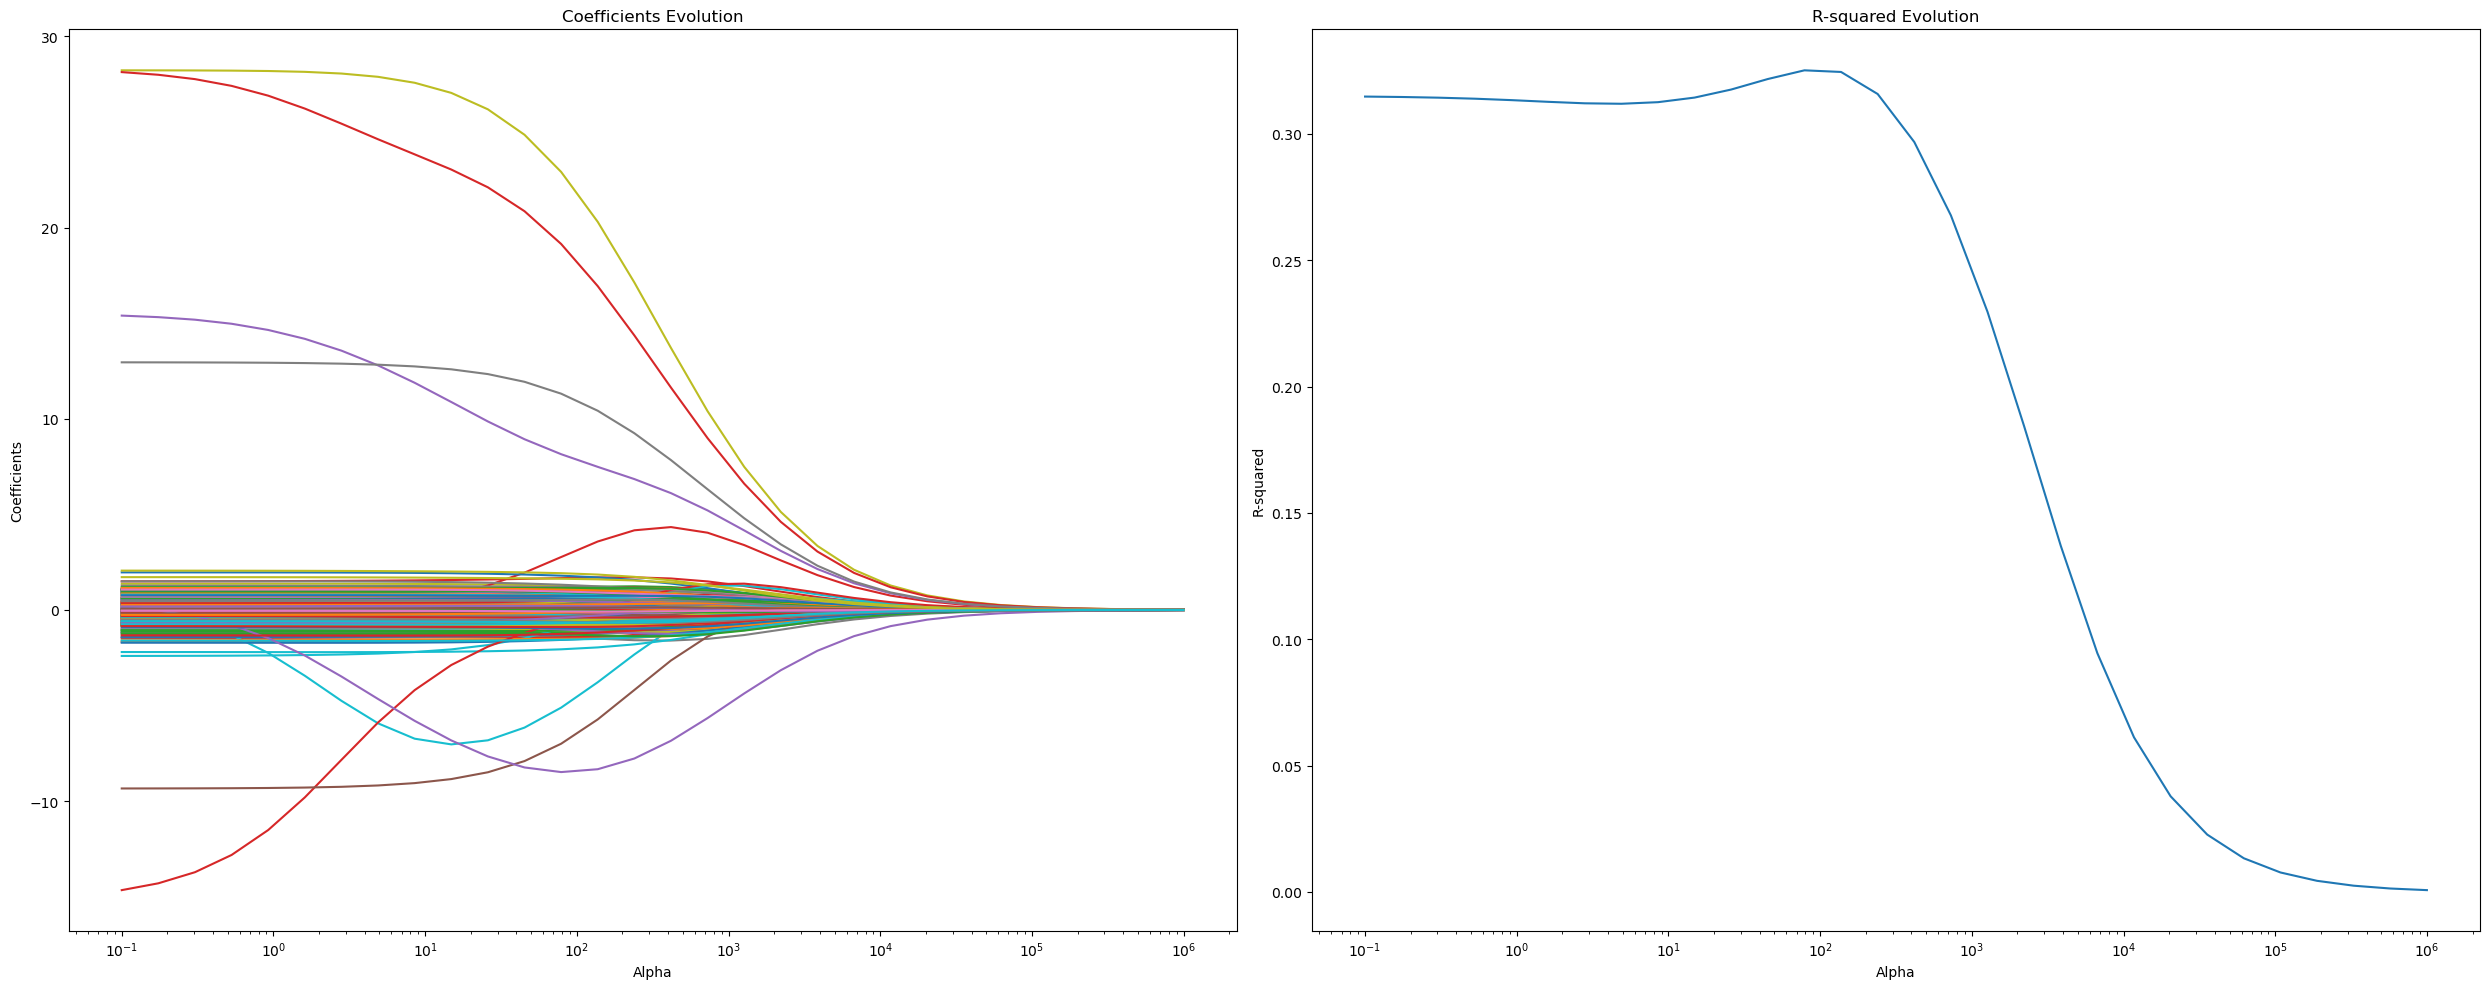

In [28]:
def regression_model(model_class, X_train, y_train, X_test, y_test, alpha_start, alpha_end, num_alphas):
    
    alphas = np.logspace(alpha_start, alpha_end, num_alphas)

    #  lists to store results
    coefs = []
    r_squared = []

    for a in alphas:
        # create and fit the model
        reg_model = model_class(alpha=a,max_iter=30000)
        reg_model.fit(X_train, y_train)

        coefs.append(reg_model.coef_)
        r_squared.append(r2_score(y_test, reg_model.predict(X_test)))


    fig, axes = plt.subplots(1, 2, figsize=(25, 10))
    
    axes[0].plot(alphas, coefs)
    axes[0].set_xscale('log')
    axes[0].set_xlabel('Alpha')
    axes[0].set_ylabel('Coefficients')
    axes[0].set_title('Coefficients Evolution')

    axes[1].plot(alphas, r_squared)
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Alpha')
    axes[1].set_ylabel('R-squared')
    axes[1].set_title('R-squared Evolution')

    plt.tight_layout()
    plt.show()


Ridge_model = regression_model(Ridge, X_train_scaled, y_train, X_test_scaled, y_test,-1,6,30)
Ridge_model

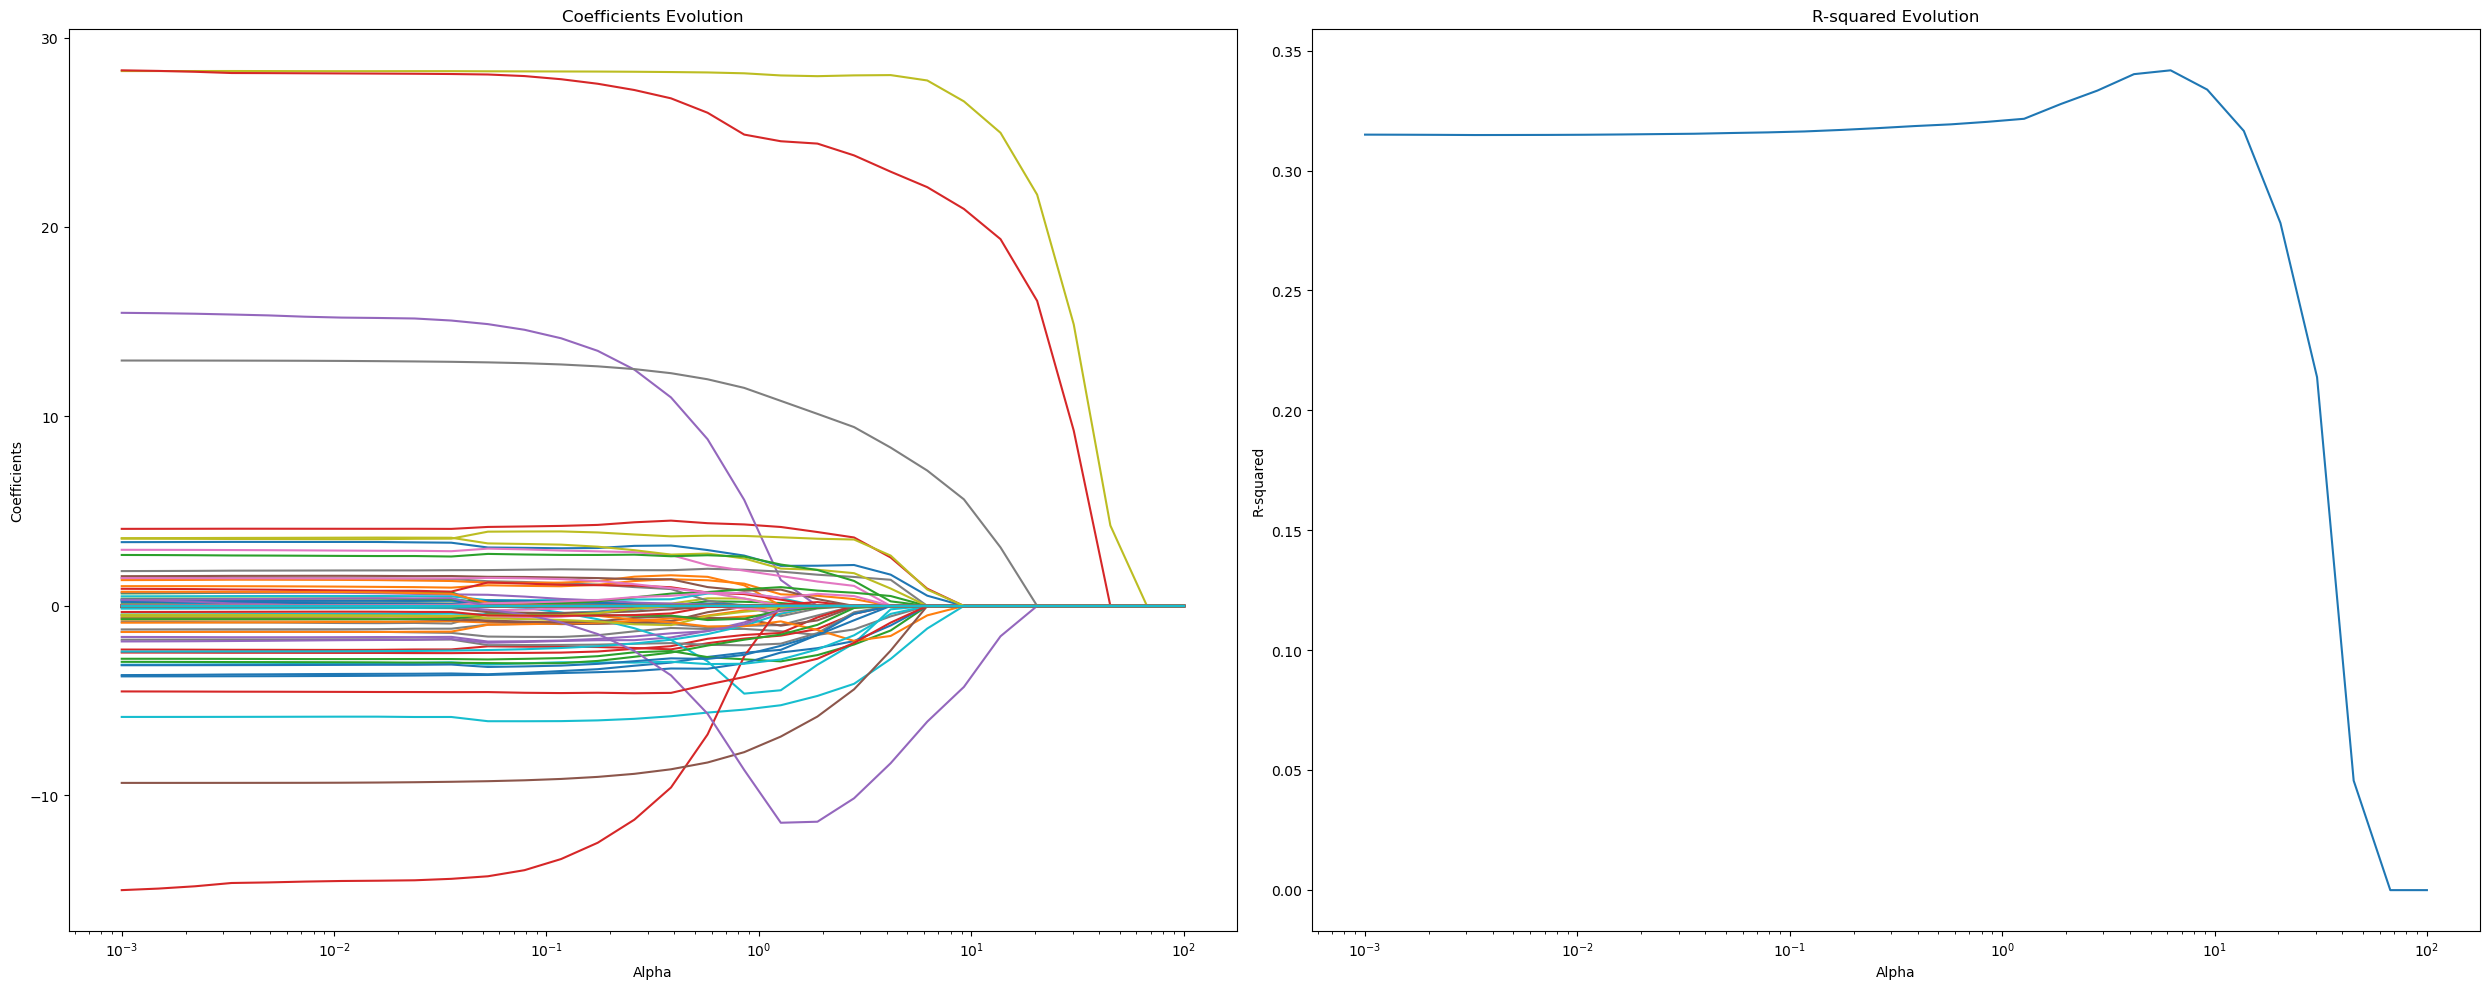

In [29]:
Lasso_model = regression_model(Lasso, X_train_scaled, y_train, X_test_scaled, y_test,-3,2,30)
Lasso_model

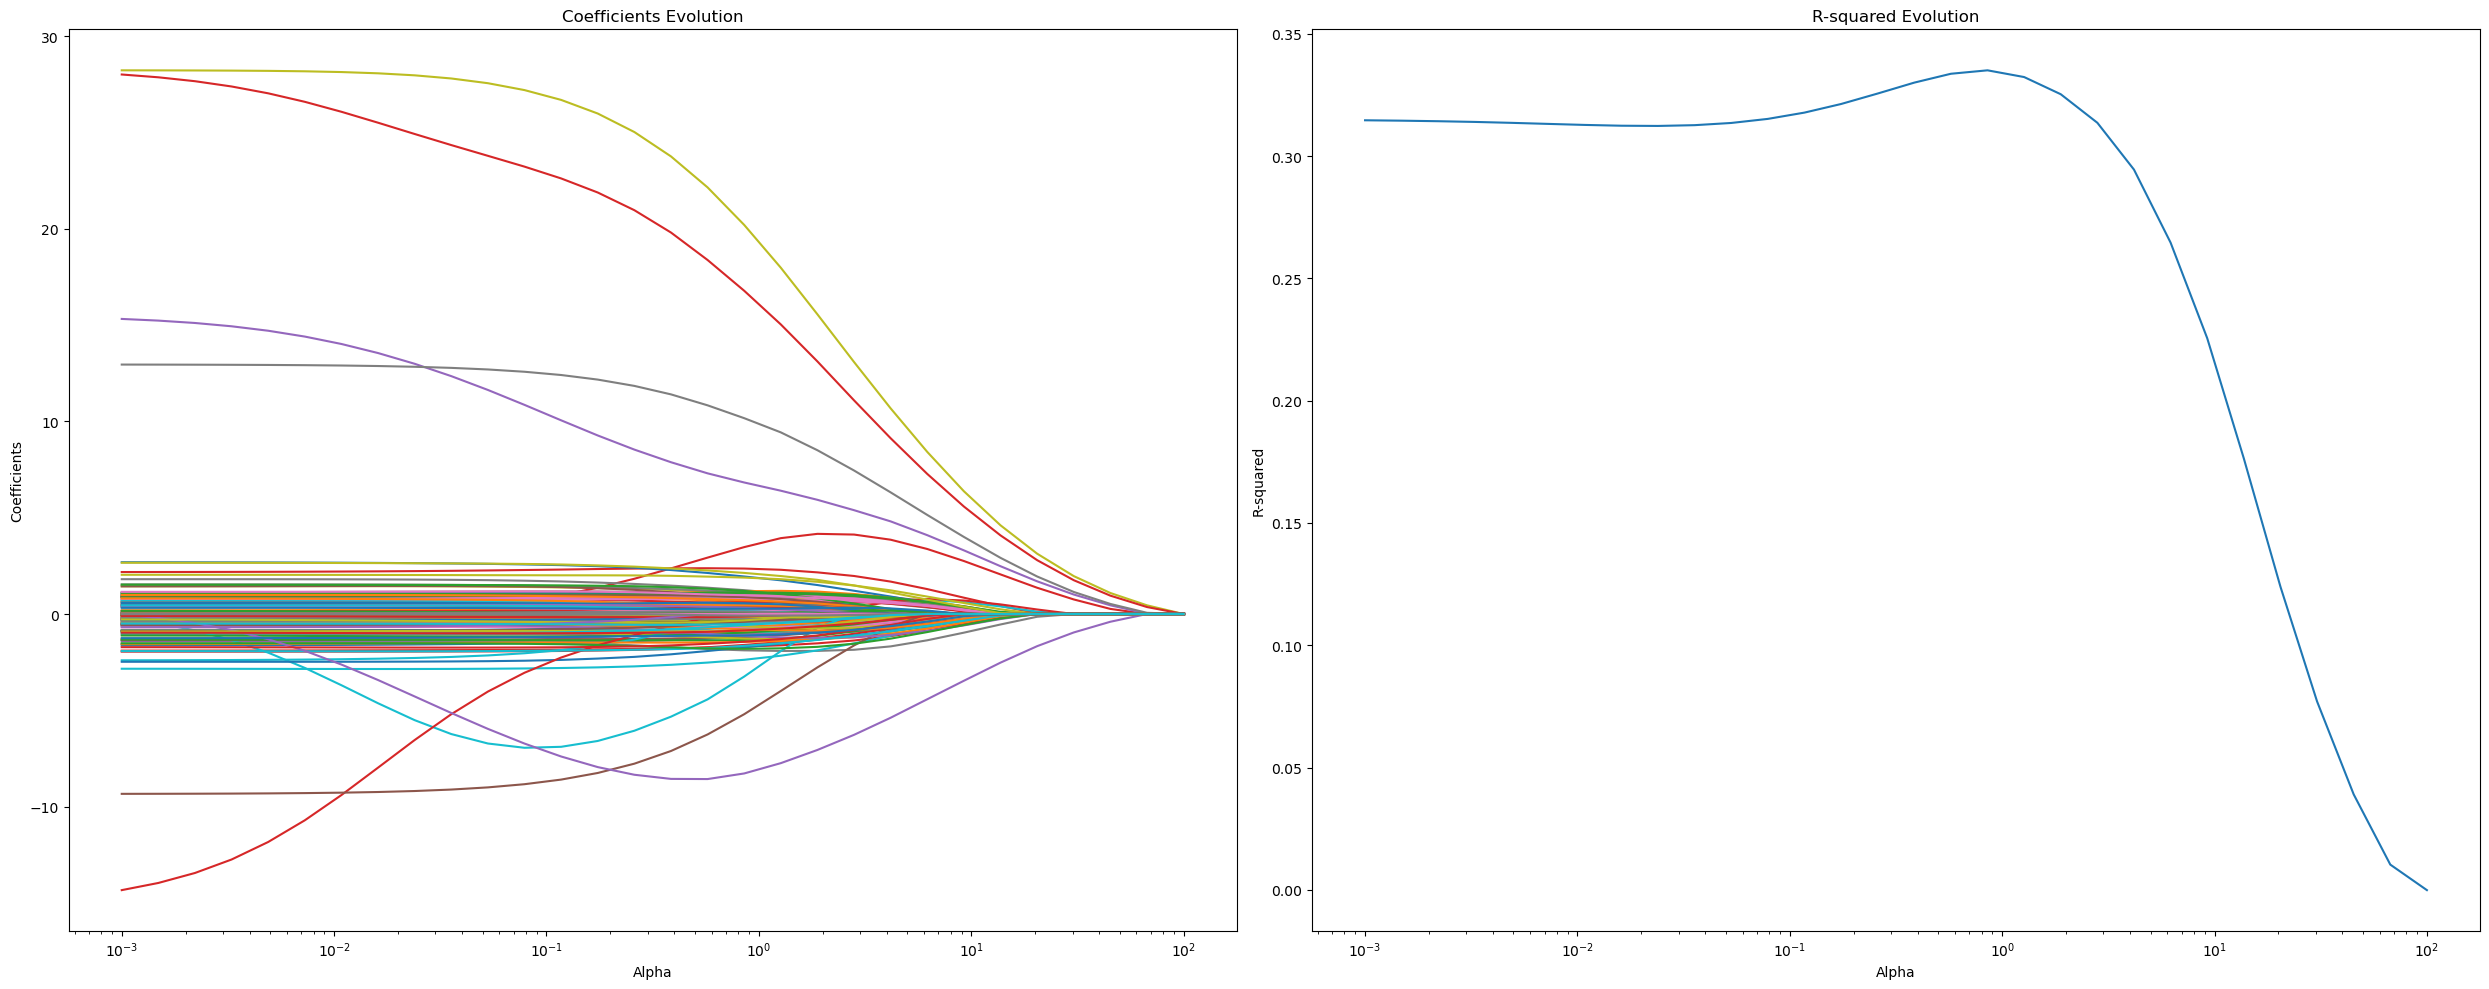

In [30]:
ElasticNet_model =regression_model(ElasticNet, X_train_scaled, y_train, X_test_scaled, y_test,-3,2,30)
ElasticNet_model

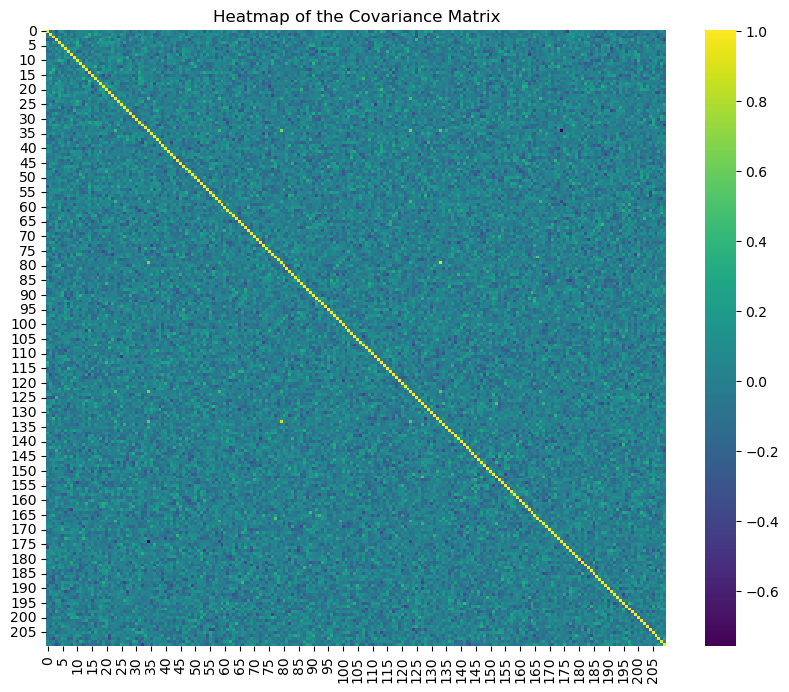

In [15]:

# covariance matrix
cov_matrix = np.cov(X_train_scaled, rowvar=False)

# SVD on the covariance matrix
U, s, V = np.linalg.svd(cov_matrix)

# heatmap of the covariance matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False, cmap='viridis')
plt.title("Heatmap of the Covariance Matrix")
plt.show()

In [16]:
def perform_pca_using_svd(X):

    # Compute SVD
    U, s, Vt = np.linalg.svd(X)

    # Compute the PCA
    # The principal components are given by U * s. 
    pca_components = Vt

    return pca_components

# Applying PCA using SVD
pca_components = perform_pca_using_svd(X_train_scaled)

print(pca_components[:5, :])

[[ 0.00546269 -0.01445244 -0.13120306 ...  0.02635808  0.01782481
   0.02097978]
 [-0.02917297 -0.09780908 -0.20679095 ...  0.19988113  0.05957192
   0.11054167]
 [ 0.01860983  0.00985882 -0.06303312 ...  0.03952368  0.00051596
  -0.07769402]
 [-0.07803409  0.05840636 -0.02096722 ... -0.0031855   0.00738295
  -0.14630483]
 [ 0.03724987  0.09121153  0.05697947 ... -0.04830343  0.03793005
   0.11356733]]


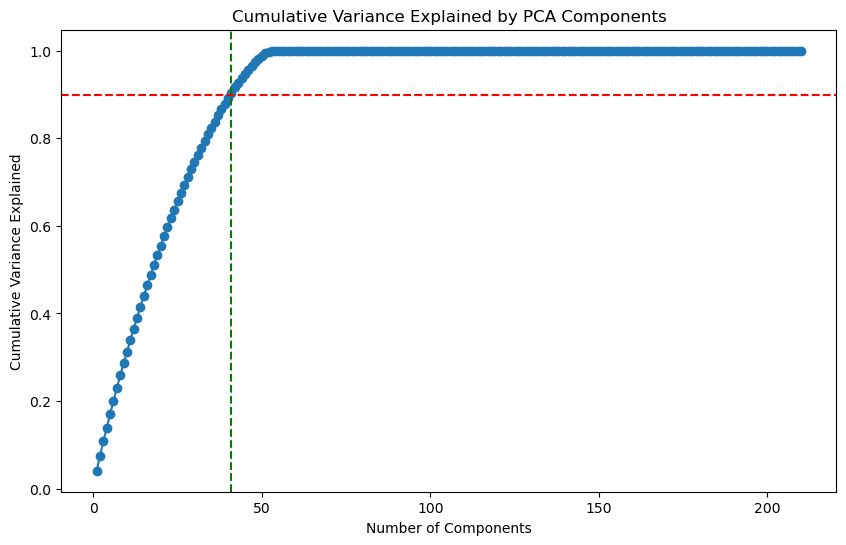

Number of components to explain >90% variance: 41


In [17]:
def plot_cumulative_variance(s, threshold=0.90):
    # variance explained by each singular value
    var_explained = np.square(s) / np.sum(np.square(s))

    # cumulative variance
    cumulative_var_explained = np.cumsum(var_explained)

    # number of components to reach the threshold
    num_components  = np.where(cumulative_var_explained >= threshold)[0][0] 
    num_components = num_components + 1


    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(s) + 1), cumulative_var_explained, marker='o')
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.axvline(x=num_components, color='g', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Explained')
    plt.title('Cumulative Variance Explained by PCA Components')
    plt.show()

    return num_components


num_components_needed = plot_cumulative_variance(s)
print("Number of components to explain >90% variance:", num_components_needed)

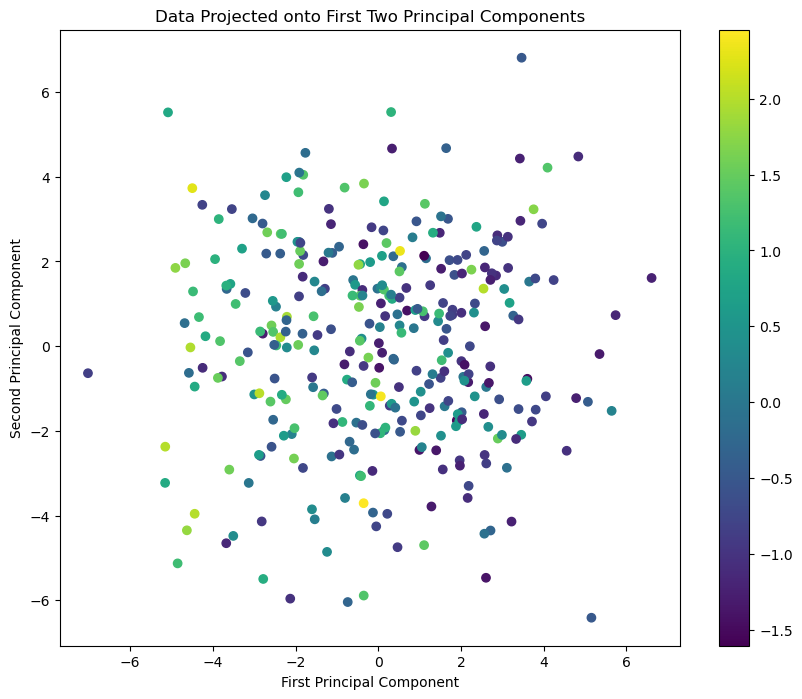

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def project_data_and_plot(X, Vt, y, num_components=2):
    # we project the data onto the first `num_components` principal components
    X_projected = np.dot(X, Vt.T[:, :num_components])

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.title('Data Projected onto First Two Principal Components')
    plt.show()


U, s, Vt = np.linalg.svd(X_train_scaled)
project_data_and_plot(X_train_scaled, Vt, y_train_scaled)

#### From the plot, it seems there is no distinct pattern or grouping of similar colors, which suggests that the first two principal components might not capture the variance in y very well. In other words, the variance in y may not be well explained by the variance in your features that these two principal components represent. This could mean that the relationship between your features and y is more complex and might require more than two dimensions to understand clearly or that other methods might be needed to capture and visualize this relationship.

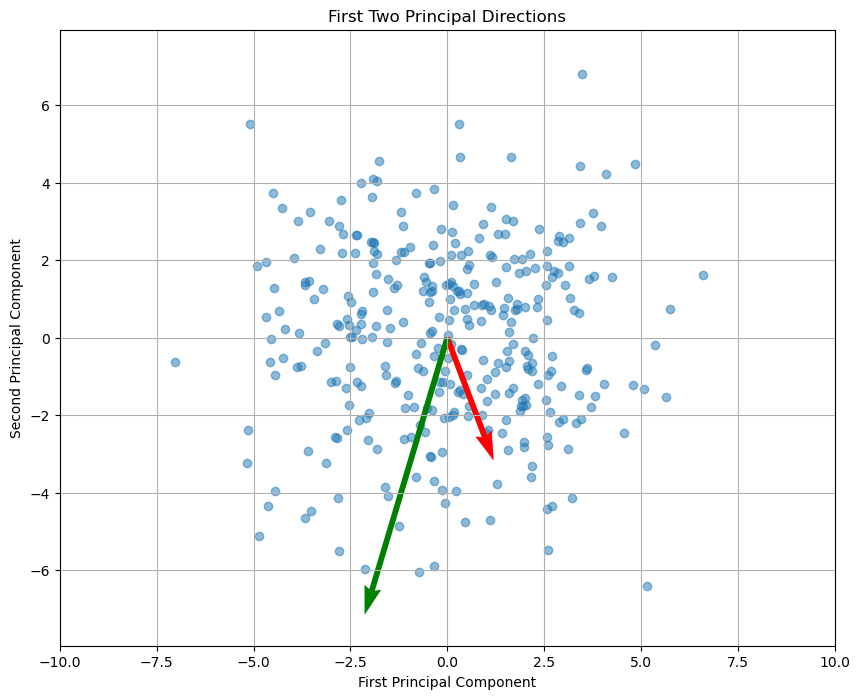

In [19]:
projection = np.dot(X_train_scaled, Vt[:2, :].T)

# Plot the projection
plt.figure(figsize=(10, 8))
plt.scatter(projection[:, 0], projection[:, 1], alpha=0.5)

# scale factors to the vectors visible on the plot
scale_factor = max(np.std(projection[:, 0]), np.std(projection[:, 1])) * 30

# first principal direction
plt.quiver(0, 0, Vt[0, 0], Vt[0, 1], angles='xy', scale_units='xy', scale=1/scale_factor/3, color='r')

# second principal direction
plt.quiver(0, 0, Vt[1, 0], Vt[1, 1], angles='xy', scale_units='xy', scale=1/scale_factor, color='g')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Directions')
plt.grid(True)
plt.axis('equal')  
plt.xlim(-10, 10)  
plt.ylim(-10, 10)  
plt.show()

<Figure size 1000x600 with 0 Axes>

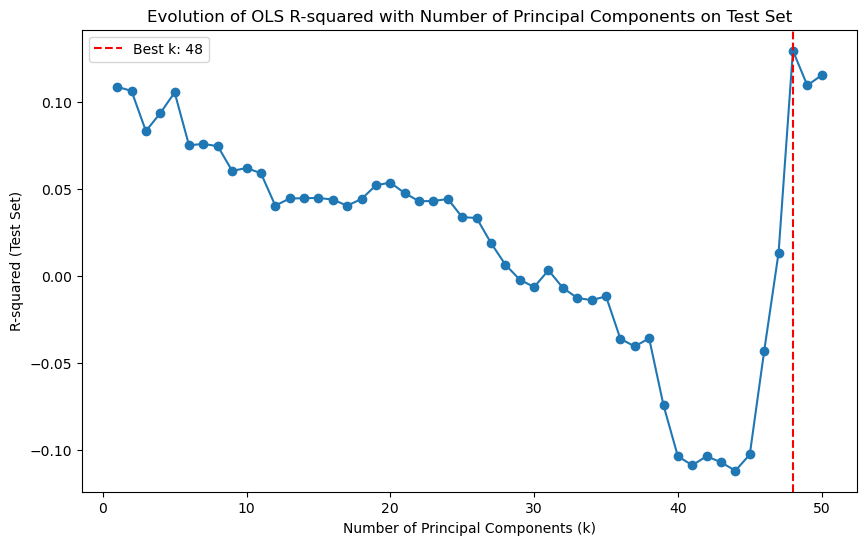

Best number of components: 48, Best R-squared on test set: 0.12924733243092779


In [20]:
def pcr_ols(Vt, X_train, y_train, X_test, y_test, max_components=50):
    scores = []
    best_score = -np.inf
    best_k = 0

    for k in range(1, max_components + 1):
        # project the training data onto the first k principal components
        X_train_k = X_train @ Vt[:k, :].T

        # project the test data onto the same k principal components
        X_test_k = X_test @ Vt[:k, :].T


        ols = LinearRegression().fit(X_train_k, y_train)


        y_pred = ols.predict(X_test_k)

        # Score of the model ( R-squared metric on the test set)
        score = r2_score(y_test, y_pred)
        scores.append(score)

        # Update best score and best k
        if score > best_score:
            best_score = score
            best_k = k
            
            plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_components + 1), scores, marker='o')
    plt.xlabel('Number of Principal Components (k)')
    plt.ylabel('R-squared (Test Set)')
    plt.title('Evolution of OLS R-squared with Number of Principal Components on Test Set')
    plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best k: {best_k}')
    plt.legend()
    plt.show()

    return best_k, best_score 

U, s, Vt = np.linalg.svd(X_train_scaled, full_matrices=False)
best_k, best_score = pcr_ols(Vt, X_train_scaled, y_train, X_test_scaled, y_test)  
print(f"Best number of components: {best_k}, Best R-squared on test set: {best_score}")

## Last Part : Comparasion

In [26]:
def regression_model_2(model_class, X_train, y_train, X_test, y_test, alpha_start, alpha_end, num_alphas):
    alphas = np.logspace(alpha_start, alpha_end, num_alphas)
    models = []
    train_errors = []
    test_errors = []
    train_r2_scores = []
    test_r2_scores = []

    for alpha in alphas:
        model = model_class(alpha=alpha,max_iter=30000,tol=0.001)
        model.fit(X_train, y_train)
        models.append(model)

        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)

        train_errors.append(mean_squared_error(y_train, train_pred))
        test_errors.append(mean_squared_error(y_test, test_pred))

        train_r2_scores.append(r2_score(y_train, train_pred))
        test_r2_scores.append(r2_score(y_test, test_pred))

    return alphas, models, train_errors, test_errors, train_r2_scores, test_r2_scores

#  Ridge, Lasso, and ElasticNet
ridge_alphas, ridge_models, ridge_train_errors, ridge_test_errors, ridge_train_r2, ridge_test_r2 = regression_model_2(Ridge, X_train_scaled, y_train, X_test_scaled, y_test, -1, 6, 30)
lasso_alphas, lasso_models, lasso_train_errors, lasso_test_errors, lasso_train_r2, lasso_test_r2 = regression_model_2(Lasso, X_train_scaled, y_train, X_test_scaled, y_test, -3, 2, 30)
elastic_alphas, elastic_models, elastic_train_errors, elastic_test_errors, elastic_train_r2, elastic_test_r2 = regression_model_2(ElasticNet, X_train_scaled, y_train, X_test_scaled, y_test, -3, 2, 30)



# we try to find the model with the best test error for Ridge,lasso and ElasticNet
best_ridge_index = np.argmin(ridge_test_errors)
best_ridge_alpha = ridge_alphas[best_ridge_index]

best_lasso_index = np.argmin(lasso_test_errors)
best_lasso_alpha = ridge_alphas[best_lasso_index]

best_elastic_index = np.argmin(elastic_test_errors)
best_elastic_alpha = ridge_alphas[best_elastic_index]


# OLS Model
ols_model = LinearRegression().fit(X_train_scaled, y_train)
ols_train_error = mean_squared_error(y_train, ols_model.predict(X_train_scaled))
ols_test_error = mean_squared_error(y_test, ols_model.predict(X_test_scaled))

# PCR
pcr_train_errors = []
pcr_test_errors = []

k=48
X_train_k = X_train_scaled @ Vt[:k, :].T
X_test_k = X_test_scaled @ Vt[:k, :].T

pcr_model = LinearRegression().fit(X_train_k, y_train)
pcr_train_errors.append(mean_squared_error(y_train, pcr_model.predict(X_train_k)))
pcr_test_errors.append(mean_squared_error(y_test, pcr_model.predict(X_test_k)))

# Ridge Model
ridge_model = Ridge(alpha=best_ridge_alpha).fit(X_train_scaled, y_train)
ridge_train_error = mean_squared_error(y_train, ridge_model.predict(X_train_scaled))
ridge_test_error = mean_squared_error(y_test, ridge_model.predict(X_test_scaled))

# Lasso Model
lasso_model = Lasso(alpha=best_lasso_alpha).fit(X_train_scaled, y_train)
lasso_train_error = mean_squared_error(y_train, lasso_model.predict(X_train_scaled))
lasso_test_error = mean_squared_error(y_test, lasso_model.predict(X_test_scaled))

# ElasticNet Model
elastic_model = ElasticNet(alpha=best_elastic_alpha).fit(X_train_scaled, y_train)
elastic_train_error = mean_squared_error(y_train, elastic_model.predict(X_train_scaled))
elastic_test_error = mean_squared_error(y_test, elastic_model.predict(X_test_scaled))


Train Errors:
OLS Train Error: 2745.6512
Ridge Train Error: 2452.5969
Lasso Train Error: 6253.4742
Elastic Train Error: 6253.4742
PCR Train Error (k=48): 3409.7192

Test Errors:
OLS Test Error: 3756.9380
Ridge Test Error: 3350.0629
Lasso Test Error: 4965.1265
Elastic Test Error: 4965.1265
PCR Test Error (k=48): 4322.7764


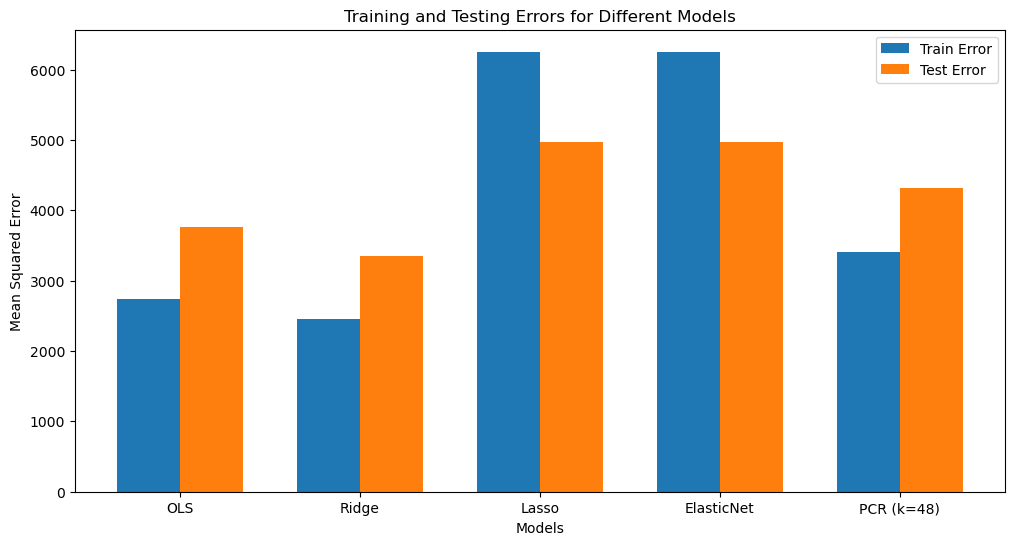

In [27]:
plt.figure(figsize=(12, 6))

models = ['OLS', 'Ridge', 'Lasso', 'ElasticNet', 'PCR (k=48)']

# Training and testing errors for each model
train_errors = [
    ols_train_error, 
    ridge_train_error, 
    lasso_train_error, 
    elastic_train_error, 
    pcr_train_errors[0]  
]

test_errors = [
    ols_test_error, 
    ridge_test_error, 
    lasso_test_error, 
    elastic_test_error, 
    pcr_test_errors[0] 
]

print("Train Errors:")
print(f"OLS Train Error: {train_errors[0]:.4f}")
print(f"Ridge Train Error: {train_errors[1]:.4f}")
print(f"Lasso Train Error: {train_errors[2]:.4f}")
print(f"Elastic Train Error: {train_errors[3]:.4f}")
print(f"PCR Train Error (k=48): {train_errors[4]:.4f}")

print("\nTest Errors:")
print(f"OLS Test Error: {test_errors[0]:.4f}")
print(f"Ridge Test Error: {test_errors[1]:.4f}")
print(f"Lasso Test Error: {test_errors[2]:.4f}")
print(f"Elastic Test Error: {test_errors[3]:.4f}")
print(f"PCR Test Error (k=48): {test_errors[4]:.4f}")

x = np.arange(len(models)) 
width = 0.35 
plt.bar(x - width/2, train_errors, width, label='Train Error')
plt.bar(x + width/2, test_errors, width, label='Test Error')

plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Training and Testing Errors for Different Models')
plt.xticks(x, models)
plt.legend()

plt.show()

In [24]:
ols_train_r2 = r2_score(y_train, ols_model.predict(X_train_scaled))
ols_test_r2 = r2_score(y_test, ols_model.predict(X_test_scaled))

pcr_train_r2 = r2_score(y_train, pcr_model.predict(X_train_k))
pcr_test_r2 = r2_score(y_test, pcr_model.predict(X_test_k))

Train R-squared values:
OLS Train R-squared: 0.5609
PCR Train R-squared: 0.4547
Max Ridge Train R-squared: 0.6190
Max Lasso Train R-squared: 0.6190
Max Elastic Train R-squared: 0.6190

Test R-squared values:
OLS Test R-squared: 0.2432
PCR Test R-squared: 0.1292
Max Ridge Test R-squared: 0.3252
Max Lasso Test R-squared: 0.3418
Max Elastic Test R-squared: 0.3351


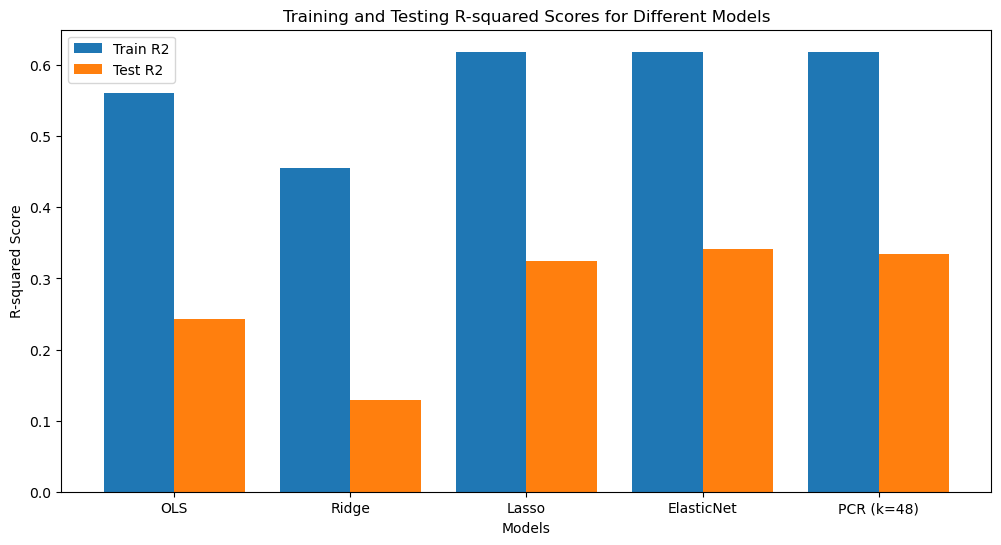

In [25]:
train_r2 = [
    ols_train_r2, 
    pcr_train_r2,
    max(ridge_train_r2),  
    max(lasso_train_r2),  
    max(elastic_train_r2)  
]
test_r2 = [
    ols_test_r2, 
    pcr_test_r2,
    max(ridge_test_r2),  
    max(lasso_test_r2),  
    max(elastic_test_r2)  
]
print("Train R-squared values:")
print(f"OLS Train R-squared: {train_r2[0]:.4f}")
print(f"PCR Train R-squared: {train_r2[1]:.4f}")
print(f"Max Ridge Train R-squared: {train_r2[2]:.4f}")
print(f"Max Lasso Train R-squared: {train_r2[3]:.4f}")
print(f"Max Elastic Train R-squared: {train_r2[4]:.4f}")

print("\nTest R-squared values:")
print(f"OLS Test R-squared: {test_r2[0]:.4f}")
print(f"PCR Test R-squared: {test_r2[1]:.4f}")
print(f"Max Ridge Test R-squared: {test_r2[2]:.4f}")
print(f"Max Lasso Test R-squared: {test_r2[3]:.4f}")
print(f"Max Elastic Test R-squared: {test_r2[4]:.4f}")

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, train_r2, 0.4, label='Train R2')
plt.bar(x + 0.2, test_r2, 0.4, label='Test R2')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.xticks(x, models)
plt.title('Training and Testing R-squared Scores for Different Models')
plt.legend()
plt.show()

#### For MSE :
#### Training Errors: Ridge Regression has the lowest training error, followed by OLS, we see that Ridge is fitting the training data well, possibly due to its regularization which prevents overfitting. Lasso and ElasticNet have significantly higher training errors, suggesting that the level of regularization might be too strong, leading to underfitting.
#### Testing Errors:  Ridge Regression performs best on the testing data, closely followed by OLS. The higher errors in Lasso and ElasticNet indicate that they might not be capturing the patterns in the data as effectively. PCR, while reducing dimensionality, has not performed as well as Ridge or OLS, we might conclude that the dimensionality reduction might be losing some important information.
#### For R-Squared :
#### Training R-squared values:  Ridge, Lasso, and ElasticNet have the highest R-squared values, indicating they explain a significant portion of the variance in the training data. However, OLS and PCR have lower R-squared values, with PCR having the lowest, which indicates potential loss of information due to dimensionality reduction.
#### Testing R-squared values: Ridge Regression has the highest R-squared value on testing data, which means it generalizes better compared to others. Lasso and ElasticNet also have decent scores. PCR and OLS have low score that indicates less effectiveness in explaining the variance in the test data.
#### Overall:
#### Ridge Regression appears to be the best model between the ones we tested. It achieves a balance between fitting the training data and generalizing to new data
#### Lasso and ElasticNet have high values in MSE but have decent R-squared, indicating possible underfitting issues.
#### PCR with k= 48 has higher MSE and lower R-squared scores, suggesting that the reduced number of components might be too few to capture the necessary variance in the data.
#### OLS gives good results but Ridge is better in terms of both training and testing.